<h1>Mnist 多层感知器<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#构建多层感知器" data-toc-modified-id="构建多层感知器-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>构建多层感知器</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 构建多层感知器

In [3]:
# 初始化模型参数
x  = tf.placeholder(tf.float32, [None, 784])
# 初始化各层权重
W1 = tf.Variable(tf.random_normal([784,200],mean=0,stddev=0.08,seed=66))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.08,seed=66))
b2 = tf.Variable(tf.zeros([200]))
W3 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.08,seed=66))
b3 = tf.Variable(tf.zeros([200]))
W4 = tf.Variable(tf.zeros([200,10]))
b4 = tf.Variable(tf.zeros([10]))

In [4]:
# 添加隐层
hidden1 = tf.nn.relu6(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu(tf.matmul(hidden2,W3)+b3)
# 设置logit
y = tf.matmul(hidden3, W4) + b4
# 初始化y_truth
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
# 设置交叉熵(不加正则)
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
#    +tf.contrib.layers.l1_regularizer(0.005)(W4)

In [6]:
# 设置随机梯度下降
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [7]:
# 设置Session
sess = tf.Session()
init_op = tf.global_variables_initializer()#初始化可变变量
sess.run(init_op)

In [12]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [13]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

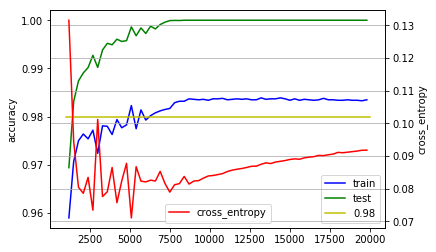

In [16]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [11]:
df

,acc,c_e
1200,0.9692,0.977982
1500,0.9634,0.973709
1800,0.9741,0.985182
2100,0.9770,0.990218
2400,0.9721,0.987873
2700,0.9723,0.987327
3000,0.9766,0.990836
3300,0.9774,0.993782
3600,0.9755,0.993836
3900,0.9758,0.995291


## 结论

将这个非常简陋模型复杂化后，这个模型优化至98%以上的准确率。
Hint：
- 多隐层: 3层
- 激活函数: 一层:relu6, 二层:tanh , 三层:relu
- 正则化: 无
- 初始化: 见上面注释
- 摸索一下各个超参数
  - 隐层神经元数量:一层:784x200, 二层:200x200, 三层:200x200
  - 学习率: 0.5
  - 正则化惩罚因子: 无
  - 最好每隔300个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整